In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

## Dataset Preprocessing

In [2]:
df1 = pd.read_csv("FINAL FOOD DATASET/FOOD-DATA-GROUP1.csv")
df2 = pd.read_csv("FINAL FOOD DATASET/FOOD-DATA-GROUP2.csv")
df3 = pd.read_csv("FINAL FOOD DATASET/FOOD-DATA-GROUP3.csv")
df4 = pd.read_csv("FINAL FOOD DATASET/FOOD-DATA-GROUP4.csv")
df5 = pd.read_csv("FINAL FOOD DATASET/FOOD-DATA-GROUP5.csv")

df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [3]:
print(df.shape)

(1673, 37)


In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,cream cheese,51,5.0,2.9,1.3,0.200,0.8,0.500,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,1,1,neufchatel cheese,215,19.4,10.9,4.9,0.800,3.1,2.700,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,2,2,requeijao cremoso light catupiry,49,3.6,2.3,0.9,0.000,0.9,3.400,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,3,3,ricotta cheese,30,2.0,1.3,0.5,0.002,1.5,0.091,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,4,4,cream cheese low fat,30,2.3,1.4,0.6,0.042,1.2,0.900,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


In [9]:
column_types = df.dtypes
print(column_types)

Unnamed: 0.1              int64
Unnamed: 0                int64
food                     object
Caloric Value             int64
Fat                     float64
Saturated Fats          float64
Monounsaturated Fats    float64
Polyunsaturated Fats    float64
Carbohydrates           float64
Sugars                  float64
Protein                 float64
Dietary Fiber           float64
Cholesterol             float64
Sodium                  float64
Water                   float64
Vitamin A               float64
Vitamin B1              float64
Vitamin B11             float64
Vitamin B12             float64
Vitamin B2              float64
Vitamin B3              float64
Vitamin B5              float64
Vitamin B6              float64
Vitamin C               float64
Vitamin D               float64
Vitamin E               float64
Vitamin K               float64
Calcium                 float64
Copper                  float64
Iron                    float64
Magnesium               float64
Manganes

In [10]:
# Remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing values (if any)
df.fillna(0, inplace=True)

# Convert relevant columns to numeric if needed
nutritional_columns = ['Caloric Value', 'Fat', 'Saturated Fats', 'Sugars', 
                       'Sodium', 'Protein', 'Dietary Fiber']

df[nutritional_columns] = df[nutritional_columns].apply(pd.to_numeric)

food                    0
Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: int64


/var/folders/bd/6ymw4wqd5pg1bvf1ygr5my6m0000gn/T/ipykernel_42497/1891039491.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)
/var/folders/bd/6ymw4wqd5pg1bvf1ygr5my6m0000gn/T/ipykernel_42497/1891039491.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[nutritional_columns] = df[nutritional_columns].apply(pd.to_numeric)


## Date Exploration

In [11]:
# Summary of key nutritional components
print(df[nutritional_columns].describe())

       Caloric Value          Fat  Saturated Fats       Sugars       Sodium  \
count    1673.000000  1673.000000     1673.000000  1673.000000  1673.000000   
mean      266.614465    12.154604        4.829194     5.044491     0.302282   
std       430.489571    31.968318       22.099630    15.062886     0.535618   
min         0.000000     0.000000        0.000000     0.000000     0.000000   
25%        62.000000     0.400000        0.078000     0.000000     0.037000   
50%       150.000000     3.200000        0.800000     0.000000     0.088000   
75%       328.000000    11.600000        3.800000     3.400000     0.300000   
max      6077.000000   550.700000      672.000000   291.500000     7.000000   

           Protein  Dietary Fiber  
count  1673.000000    1673.000000  
mean     17.664874       2.304008  
std      37.611615       6.042151  
min       0.000000       0.000000  
25%       1.200000       0.000000  
50%       5.600000       0.000000  
75%      20.000000       1.800000  


### Correlation

Check the correlation between major nutritional metrics like calories, fats, and sugars.

/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


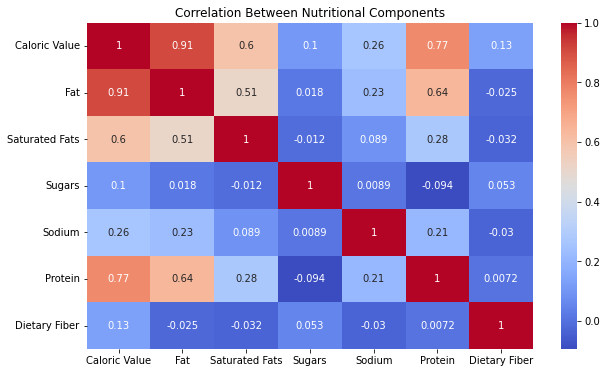

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[nutritional_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Nutritional Components')
plt.show()

### Defining Healthy and Unhealthy Items

In [14]:
healthy_items = df[(df['Caloric Value'] < 250) & 
                   (df['Saturated Fats'] < 3) &
                   (df['Sugars'] < 5) &
                   (df['Protein'] > 5) &
                   (df['Dietary Fiber'] > 2)]

unhealthy_items = df[(df['Caloric Value'] > 500) | 
                     (df['Saturated Fats'] > 10) |
                     (df['Sugars'] > 20) |
                     (df['Sodium'] > 1000)]

## Visualization

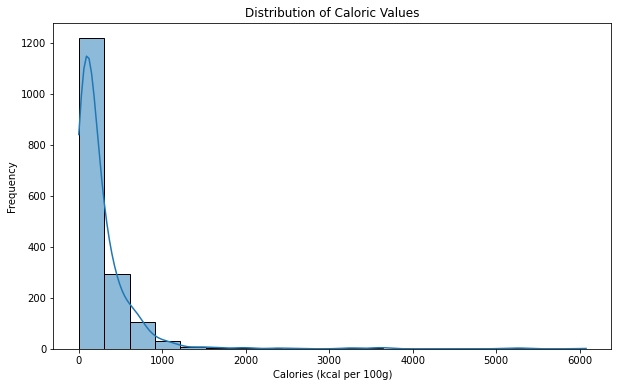

In [15]:
# Visualize caloric distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Caloric Value'], bins=20, kde=True)
plt.title('Distribution of Caloric Values')
plt.xlabel('Calories (kcal per 100g)')
plt.ylabel('Frequency')
plt.show()

### Nutrient Comparison Across Food Items


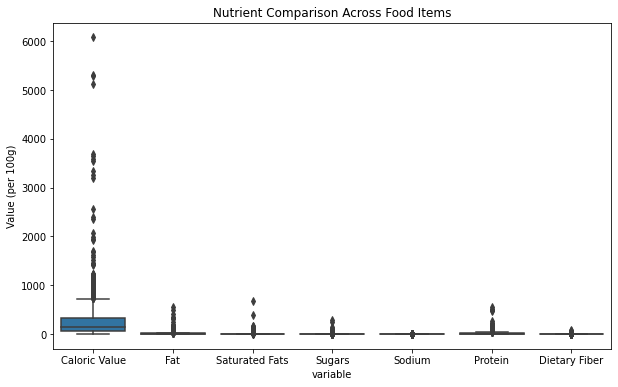

In [16]:
# Compare healthy and unhealthy items in terms of key nutrients
plt.figure(figsize=(10, 6))
df_melted = pd.melt(df, id_vars='food', value_vars=nutritional_columns)
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Nutrient Comparison Across Food Items')
plt.ylabel('Value (per 100g)')
plt.show()

# Recomendation of Healthy and Unhealthy Food

In [17]:
print("Healthy Food Items:")
print(healthy_items[['food', 'Caloric Value', 'Saturated Fats', 
                     'Sugars', 'Protein', 'Dietary Fiber', 
                     'Sodium']].sort_values('Caloric Value'))

Healthy Food Items:
                         food  Caloric Value  Saturated Fats  Sugars  Protein  \
1127           cowpeas cooked             81           0.037     2.3      5.4   
782           oat bran cooked             88           0.400     0.0      7.0   
253                 crab soup             95           0.200     0.0     10.4   
219      bean with bacon soup            106           1.000     0.6      5.5   
805                wheat germ            112           0.500     0.0      7.2   
...                       ...            ...             ...     ...      ...   
1093       pinto beans cooked            245           0.200     0.6     15.4   
796              spelt cooked            246           0.000     0.0     10.7   
842   white rice pasta cooked            246           1.100     0.0      5.1   
155        vegetarian fillets            247           2.400     0.7     19.6   
1108       white beans cooked            249           0.200     0.6     17.4   

      D

In [18]:
print("Unhealthy Food Items to Avoid:")
print(unhealthy_items[['food', 'Caloric Value', 'Saturated Fats', 
                       'Sugars', 'Sodium']].sort_values('Caloric Value', ascending=False))


Unhealthy Food Items to Avoid:
                                         food  Caloric Value  Saturated Fats  \
1437                           goose meat raw           6077         160.200   
1374                      pork arm picnic raw           5298         113.600   
1376                   pork arm picnic cooked           5292         109.300   
1430                            duck meat raw           5123         167.600   
1372                             pork backfat           3683         146.100   
...                                       ...            ...             ...   
1559              ice tea lemon flavor nestle             88           0.000   
1565                            pink lemonade             86           0.079   
975                             papaya canned             80           0.100   
1456  yoplait light strawberry yogurt yoplait             79          14.100   
1663                nesfit diet cereal nestle             75          14.500   

      Su